**Importing the file**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Once mounted, you can access files in your Google Drive like this:
file_path = '/content/drive/My Drive/Dear/patient_counts12.xlsx'

# Read data from Excel file
df = pd.read_excel(file_path)


Mounted at /content/drive


In [ ]:
# Select the features for clustering (replace with your chosen features)
features = ["Patients", "Patients_Day_Before", "Patients_2_Days_Before", "Patients_3_Days_Before", "Patients_7_Days_Before"]

Assume K = 5 and doing the things

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[features])

# Assign cluster labels to each data point
df["cluster"] = kmeans.labels_

# Save results to a new Excel file
output_file_path = '/content/drive/My Drive/Dear/clustering.xlsx'
df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering results saved to: /content/drive/My Drive/Dear/clustering.xlsx


 Calculate the optimal value for K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[233322.0159216165, 110525.36650974752, 74525.49737372101, 57593.629139182696, 50699.28020225723, 46030.13993140684, 41697.88165532684, 38812.200614286776, 36726.94578973332]


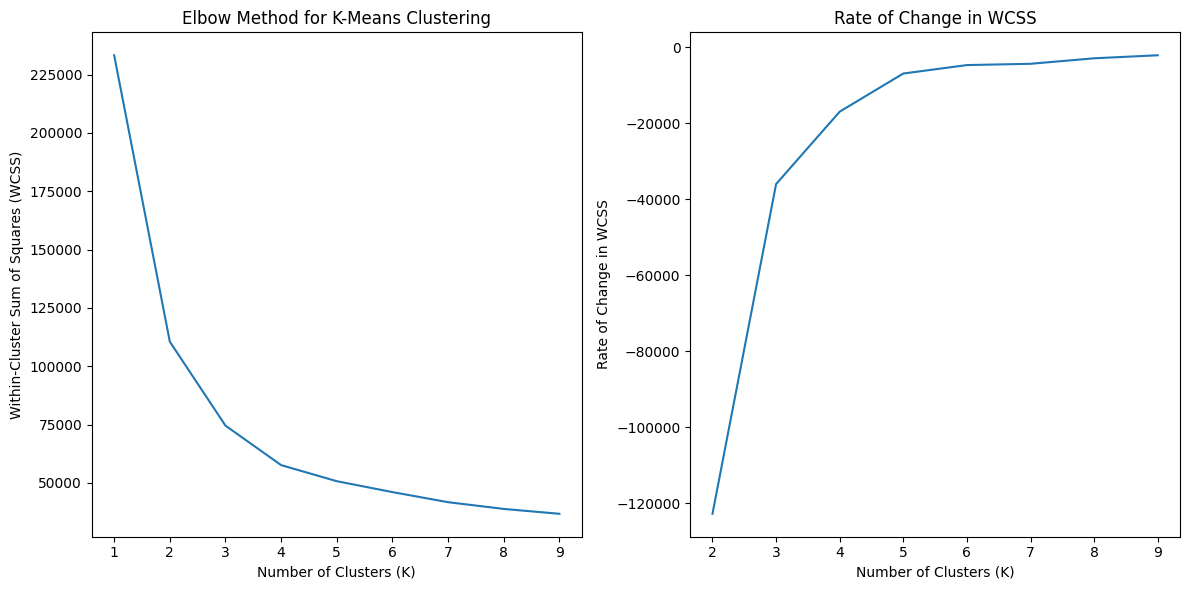

In [ ]:
# Calculate WCSS as before
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_range = range(1, 10)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

# Calculate rate of change in WCSS
rate_of_change = []
for i in range(1, len(wcss)):
    rate_of_change.append(wcss[i] - wcss[i-1])

# Plot WCSS vs. K and rate of change vs. K
plt.figure(figsize=(12, 6))

print(wcss)

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for K-Means Clustering")

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], rate_of_change)  # Exclude the first rate of change (undefined)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Rate of Change in WCSS")
plt.title("Rate of Change in WCSS")

plt.tight_layout()
plt.show()


In [ ]:
i = 1
for i in range(1,8):
  print((wcss[i-1]-wcss[i])/(wcss[i]-wcss[i+1]))

3.411030438690719
2.1261604825504437
2.455905320349085
1.4765778145426767
1.0777612906022798
1.5012949159892444
1.383850552489677


Save the cluster values in a New file

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[features])

# Assign cluster labels to each data point
df["cluster"] = kmeans.labels_

# Save results to a new Excel file
output_file_path = '/content/drive/My Drive/Dear/clustering.xlsx'
df.to_excel(output_file_path, index=False)

print("Clustering results saved to:", output_file_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering results saved to: /content/drive/My Drive/Dear/clustering.xlsx


Save the each cluster values in a new file

In [ ]:
import pandas as pd

# Read data from Excel file
file_path = '/content/drive/My Drive/Dear/clustering.xlsx'
df = pd.read_excel(file_path)

# Get the cluster labels
cluster_labels = df['cluster']

# Separate data points based on cluster labels
clustered_data = {}
for i in range(len(df)):
    cluster_id = cluster_labels.iloc[i]
    if cluster_id not in clustered_data:
        clustered_data[cluster_id] = []
    clustered_data[cluster_id].append(df.iloc[i])

# Save each cluster data to a separate Excel file
for cluster_id, data in clustered_data.items():
    df_cluster = pd.DataFrame(data)
    df_cluster.to_excel(f'/content/drive/My Drive/Dear/cluster_{cluster_id}.xlsx', index=False)

print("Clusters saved to separate Excel files.")


Clusters saved to separate Excel files.


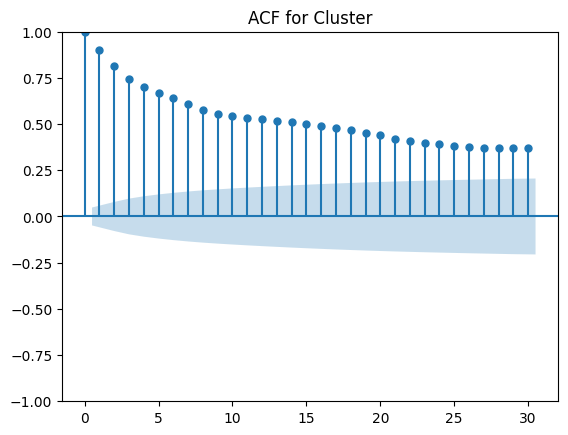

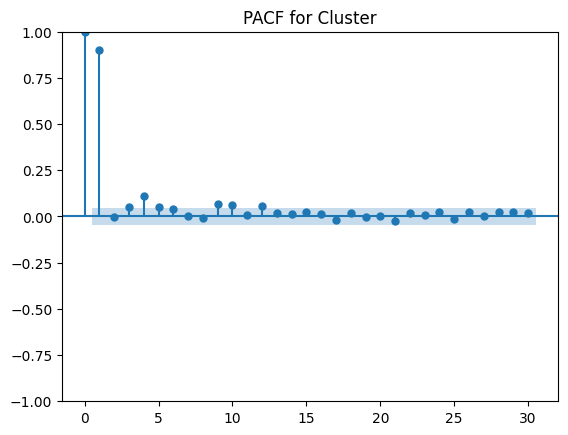

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Assuming you have your data separated into clusters in separate CSV files
cluster_files = ["/content/drive/My Drive/Dear/clustering.xlsx"]
# Loop through each cluster file
for cluster_file in cluster_files:
    df = pd.read_excel(cluster_file)

    # Extract bed demand data
    bed_demand = df["Patients"]

    # Calculate and plot ACF
    fig, ax = plt.subplots()
    acf = plot_acf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
    plt.title(f"ACF for Cluster")
    plt.show()

    # Calculate and plot PACF
    fig, ax = plt.subplots()
    pacf = plot_pacf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
    plt.title(f"PACF for Cluster")
    plt.show()


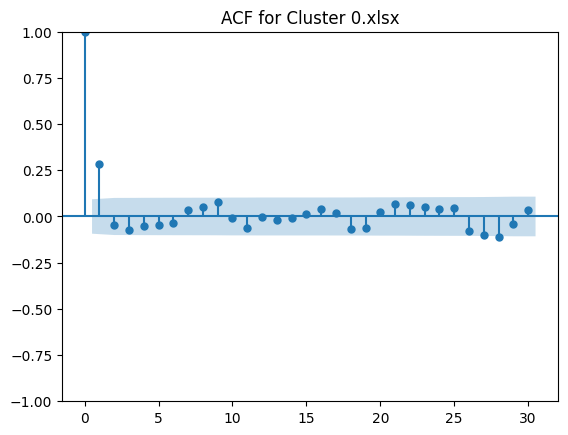

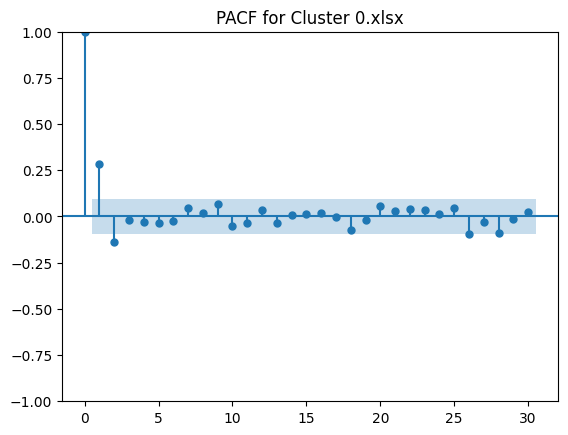

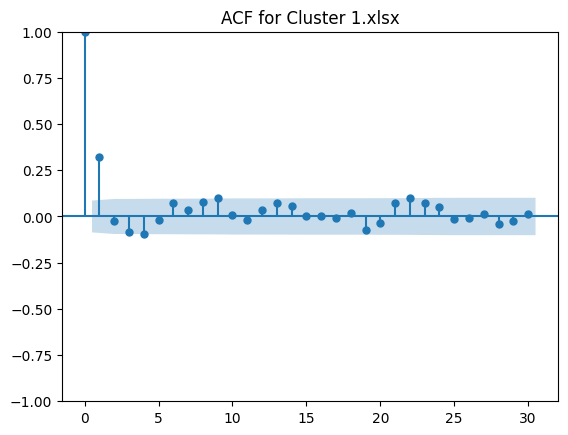

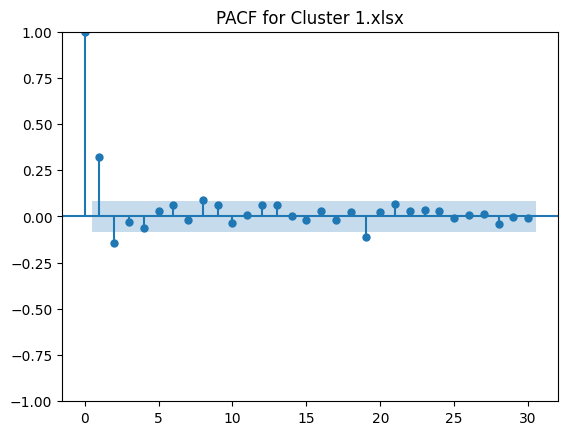

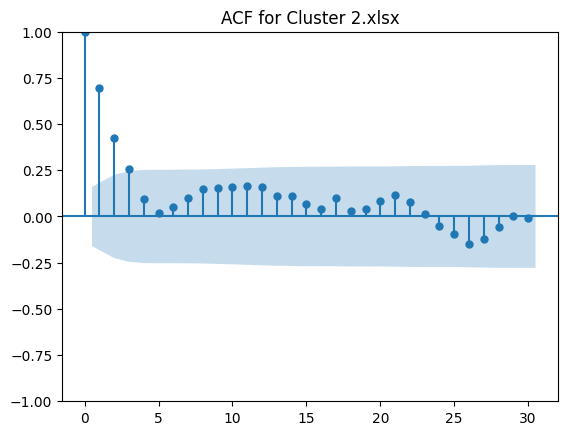

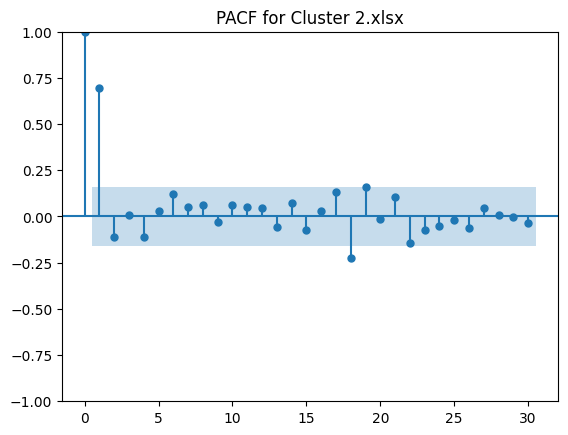

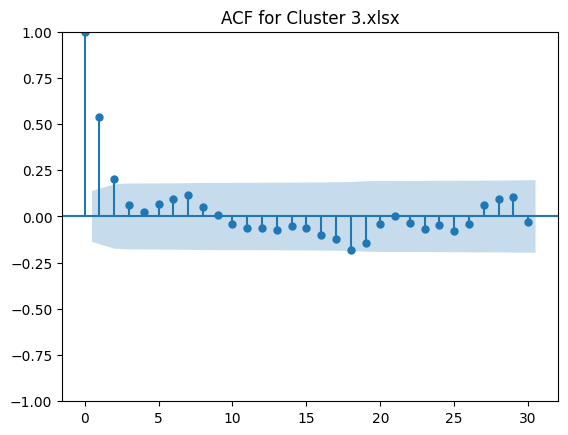

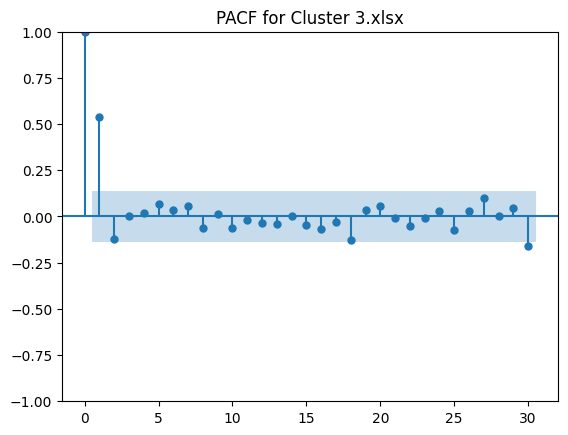

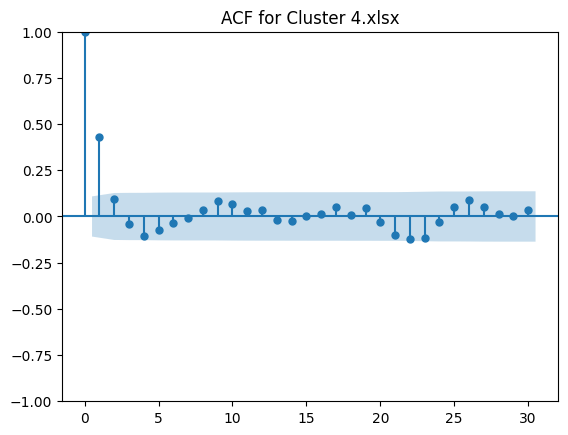

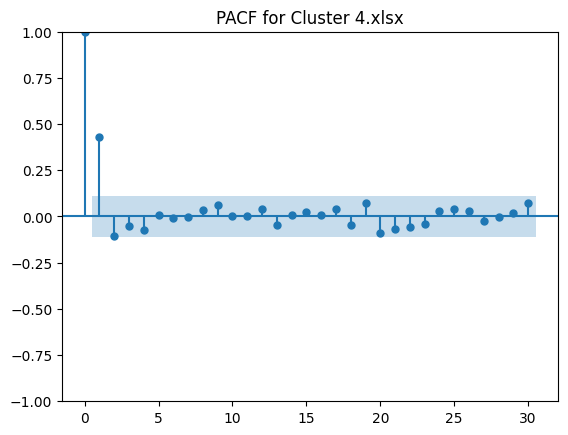

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have your data separated into clusters in separate CSV files
cluster_files = ["/content/drive/My Drive/Dear/cluster_0.xlsx", "/content/drive/My Drive/Dear/cluster_1.xlsx","/content/drive/My Drive/Dear/cluster_2.xlsx","/content/drive/My Drive/Dear/cluster_3.xlsx","/content/drive/My Drive/Dear/cluster_4.xlsx"]  # Replace with your actual filenames

# Loop through each cluster file
for cluster_file in cluster_files:
    df = pd.read_excel(cluster_file)

    # Extract bed demand data
    bed_demand = df["Patients"]

    # Calculate and plot ACF
    fig, ax = plt.subplots()
    acf = plot_acf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
    plt.title(f"ACF for Cluster {cluster_file.split('_')[1]}")
    plt.show()

    # Calculate and plot PACF
    fig, ax = plt.subplots()
    pacf = plot_pacf(bed_demand, ax=ax, lags=30)  # Adjust lags as needed
    plt.title(f"PACF for Cluster {cluster_file.split('_')[1]}")
    plt.show()


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Assuming you have your data separated into clusters in separate CSV files
cluster_files = ["/content/drive/My Drive/Dear/cluster_0.xlsx", "/content/drive/My Drive/Dear/cluster_1.xlsx","/content/drive/My Drive/Dear/cluster_2.xlsx","/content/drive/My Drive/Dear/cluster_3.xlsx","/content/drive/My Drive/Dear/cluster_4.xlsx"]  # Replace with your actual filenames


# Loop through each cluster file
for cluster_file in cluster_files:
    df = pd.read_excel(cluster_file)

    # Separate features (X) and target variable (y)
    X = df.drop("Date", axis = 1)
    X = X.drop("Patients", axis=1)  # Replace "target_column" with your actual target column name
    y = df["Patients"]

    # Feature scaling (optional but recommended)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets (70:30 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

    # Define and fit the SVR model
    svr_model = SVR(kernel='poly', degree=3)  # You can adjust kernel and other hyperparameters here
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for Cluster {cluster_file.split('_')[1]}: {mae:.2f}")

    # Calculate Mean Absolute Error (MAE)
    r2 = r2_score(y_test, y_pred)
    print("R-squared:", r2)

    print()
    print("................................................")
    print()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ML_Forecast_Demand/cluster_0.xlsx'

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming you have your data separated into clusters in separate CSV files
cluster_files = ["/content/drive/My Drive/Dear/cluster_0.xlsx", "/content/drive/My Drive/Dear/cluster_1.xlsx","/content/drive/My Drive/Dear/cluster_2.xlsx","/content/drive/My Drive/Dear/cluster_3.xlsx","/content/drive/My Drive/Dear/cluster_4.xlsx"]  # Replace with your actual filenames



# Loop through each cluster file
for cluster_file in cluster_files:
    df = pd.read_excel(cluster_file)

    # Separate features (X) and target variable (y)
    X = df.drop("Date", axis = 1)
    X = X.drop("Patients", axis=1)  # Replace "target_column" with your actual target column name
    y = df["Patients"]

    # Feature scaling (optional but recommended)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data into training and testing sets (70:30 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

    # Define and fit the SVR model
    svr_model = SVR(kernel='sigmoid')  # You can adjust kernel and other hyperparameters here
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

     # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE for Cluster {cluster_file.split('_')[1]}: {mae:.2f}")

Mean Squared Error: 19.642982166667633
MAE for Cluster 0.xlsx: 3.25
Mean Squared Error: 22.05303039956418
MAE for Cluster 1.xlsx: 3.29
Mean Squared Error: 7.150523035491155
MAE for Cluster 2.xlsx: 2.01
Mean Squared Error: 8.910165856131332
MAE for Cluster 3.xlsx: 2.10
Mean Squared Error: 10.674781406387705
MAE for Cluster 4.xlsx: 2.36
